<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/labs/04%20-%20Pandas%20and%20Data%20Cleaning/Walkthrough/Walkthrough_04_Scraping_2025.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



# Web scraping - Part 0
>The goal of this Walkthrough is to provide you with insights on exploratory data analysis throughout the use of a fun and interactive technique known as web scraping. During this laboratory, you will be provided with a broad overview of this technique as well as the major tools used in the process. You will also understand how data analysis can be conducted on real-time web data and hopefully see how this combination can be further applied to any other context.


>In essence, web scraping consists in harvesting the content of a web page in order to process its information for further use. In our example, web scraping is used as a fun way to extract data that we will analyse afterwards. In most cases, this technique comes hand in hand with data cleaning and data analysis. For futher information on web scraping, click on the following [link](https://en.wikipedia.org/wiki/Web_scraping).

>**Note :** You can alse refer to this [tutorial](https://smac-group.github.io/ds/section-web-scraping.html#section-why-web-scraping-could-be-bad) at any time for additional informations on this topic from a course .


## Web scraping with Pandas

>Last week you were introduced with Pandas library and its DataFrame. Many different functions were presented to you for Dataframe manipulation. You should have noticed by now that this is a really useful library when it comes to using tables. More over, one of the perks of using Pandas is that you can directly scrap HTML tables from the web... Lets dive into it.


> The main function we are going to be using is `read_html`, it allows you to directly put the data from a web page table into a dataframe. For more information, click on this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html).

>For example, if you want to show a correlation between the greenhouse gazes emissions of a country and its GDP, you will need data. You can get these data directly from a webpage.

In [ ]:
import pandas as pd

In [ ]:
scraped_list=pd.read_html('https://en.wikipedia.org/wiki/Greenhouse_gas_emissions')
print("scraped tables " , len(scraped_list))

scraped tables  19


 The `read_html` function scraps any table from the webpage of interest as long as it has the right format. To display the top 5 companies, we have to specify with the right index.

In [ ]:
scraped_list[1].head()

,Year,Fossil fuels and industry (excluding cement carbonation) Gt C,Land use change Gt C,Total Gt C,Total Gt CO2
0,2010,9.106,1.32,10.43,38.0
1,2011,9.412,1.35,10.76,39.2
2,2012,9.554,1.32,10.87,39.6
3,2013,9.640,1.26,10.90,39.7
4,2014,9.710,1.34,11.05,40.2


## Web Scraping libraries

In order to get the data from the Web with Python, During this lab, we will need to use the following two essential libraries :

*  Requests (HTTP): retreives the web pages (html) to parse.

*  Beautiful Soup (HTML Parsing): parses the html.

Thanks to google colab, no specific environmental installation is needed to work on this lab. We can directly import the needed libraries.
Moreover, last week you were introduced with a very important library when it comes to EDA known as [Pandas](https://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html). Dataframes and the allowed manipulations come in very handy for the analysis we shall conduct on the newly fetched Data. Therefore, we will continue using this library throughout this lab as well. If you feel like you are still not at ease with Pandas basic concepts, please refer to the previous documentation or ask one of the TAs.


In [ ]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

## Retreiving the Data


>In order to get started with web scraping we must first make a [request](https://requests.readthedocs.io/en/master/user/quickstart/). In simple words, we will ask the server hosting the webpage we are interested in for its content.

> In this laboratory, we will use the [Boat24.ch](https://www.bateau24.ch/chfr/bateauxamoteur/malibu/malibu-wakesetter-22-lsv/detail/612819/) by specifying its URL as parameter to the ``requests.get`` method.



In [ ]:
# Make the request
r = requests.get("https://www.bateau24.ch/chfr/bateauxamoteur/malibu/malibu-wakesetter-22-lsv/detail/612819/")#('https://www.bateau24.ch/chfr/voiliers/formosa/formosa-51/detail/416475/')
# Response content
print('Response status code: {0}\n'.format(r.status_code))
print('Response headers: {0}\n'.format(r.headers))

Response status code: 200

Response headers: {'Date': 'Wed, 12 Feb 2025 10:04:44 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'expires': '0', 'Cache-Control': 'private, post-check=0, pre-check=0, max-age=0', 'pragma': 'no-cache', 'x-frame-options': 'deny', 'strict-transport-security': 'max-age=63072000', 'x-content-type-options': 'nosniff', 'Set-Cookie': 'lan=chfr; expires=Thu, 12 Feb 2026 10:04:44 GMT; Max-Age=31536000; path=/; domain=bateau24.ch; secure; HttpOnly; SameSite=lax, data=a%3A0%3A%7B%7D; expires=Thu, 12 Feb 2026 10:04:44 GMT; Max-Age=31536000; path=/; domain=bateau24.ch; secure; HttpOnly; SameSite=lax', 'vary': 'Accept-Encoding', 'cf-cache-status': 'DYNAMIC', 'Report-To': '{"endpoints":[{"url":"https:\\/\\/a.nel.cloudflare.com\\/report\\/v4?s=ziuNJ3oM3v5r7LJubIHYl3YltLO%2FQOKg5Vd3Hn9Cu1Uir9aF1Bu2ErG%2BmWXcM32AeZRkfKL6TRLBaAPZRji%2Fes2xcVHJgIgN7N0XQyXhkZj4mq5G0ib4NfL8wAPGKfvri5WG1vJyodbUkdrXQg%3D%3D"}],"group"

**Note :** Requesting data from a website is not always straight forward. There can be some restrictions made by the server hosting the page regarding the request origin, content or number. As such, you should always pay attention to the request policy of a website before scraping it. In our case, here it is:  [link](https://www.boat24.ch/robots.txt)


Now, lets see the raw content of our request. The body of the response here will be in HTML since we are asking for a webpage. Different format such as  JSON or XML could also be imagined for web services.

In [ ]:
print('Response body: {0}'.format(r.text)[:1000])

Response body: <!doctype html>
<html class="no-js" lang="fr" data-lan="chfr">
<head>
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<title>2024 Malibu Wakesetter 22 LSV, CHF 138'000.-</title>
<meta name="revisit-after" content="1 days">
<meta name="page-topic" content="Bateaux d'occasion, Bateaux">
<meta name="page-type" content="Annonces, Petites annonces">
<meta name="audience" content="all">
<meta name="publisher" content="Bateau24">
<meta name="copyright" content="bateau24.ch">
<meta name="distribution" content="global">
<meta name="author" content="Bateau24">
<meta name="language" content="fr">
<meta name="country" content="CH">
<meta name="viewport" content="width=device-width, initial-scale=1">
<meta name="robots" content="noindex,follow">
<meta property="fb:pages" content="111820172182512">
<link rel="shortcut icon" href="/favicon.ico">
<link rel="apple-touch-icon" sizes="180x180" href="/favicon/apple-touch-icon.png">
<link rel="icon" type="image/p

## Parsing the Data

Now as you can see, the HTTP response's body as it is, is hardly usable. Therefore, we rely on BeautifulSoup to parse the content for further processings. Thus, we specify we need the html.parser. For more information, you can click [here.](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser)

BeatifulSoup, thanks to parsing the content, will allow us to conduct a series of different operations and commands that you will be discovering in the remaining part of this lab. Note that this library can be very powerfull and complete when it comes to parsing and manipulations, this overview is not meant to display all possible features offered by BeautifulSoup.


In [ ]:
page_body = r.text
soup = BeautifulSoup(page_body, 'html.parser')

For instance, you can very easily get the title of the page using ``soup.title``.

In [ ]:
soup.title

<title>2024 Malibu Wakesetter 22 LSV, CHF 138'000.-</title>

Yet, this is stil in HTML format, therefore using the ``.string`` allows for a more conventional layout.

In [ ]:
soup.title.string

"2024 Malibu Wakesetter 22 LSV, CHF 138'000.-"

To go further with this laboratory and with Data retreival after parsing, some html notions are required. In essence, you should get acquainted with concepts like **HTML tags**. Several functions and manipulations allowed by BeautifulSoup rely on different tags (headers,divisions, paragraphs, classes, ids etc..) to retreive the data they contain. You can find more on HTML tags [here](https://www.w3schools.com/html/html_elements.asp).

**Important** : All the manipulations performed below rely on a study of the HTML body of the response. As it is specific to the website, it is fundamental to understand how to retreive the information and how where to get it from.  

In the next cell, we use the "`a`" tag as it is generally used for website links embedding (combined with ``href``).

``soup.find`` and ``soup.find_all`` will be extensively in this lab to navigate the data structure, please do not hesitate to refer to the correpsonding  [documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for more information.


In [ ]:
links = soup.find_all('a')
print('The webpage cointains {0} links...'.format(len(links)))

The webpage cointains 162 links...


Analysis of the body can also allow us to easily retreive the purchase price.

In [ ]:
price = soup.find_all('span',class_="list__value list__value--large")
price[0].text

"CHF 138'000.-"

Another useful concept of html on which BeautifulSoup relies is the notion of children. In fact, in HTML, tags are often assembled as a serie of containers each containing other tags. It is typical of a documented object model structure, you can find more clicking on this link : [DOM](https://www.w3schools.com/whatis/whatis_htmldom.asp).

Inspecting the page and using this notion lead to the following commands to retreive the advertisment metadata.

Let's look at some properties of the boat (inspecting the hmtl code of the webpage can help us determine the tags to look for)

In [ ]:
t = soup.find("ul", class_="list list--key-value l-mt-16")
for li in t.find_all("li"):
  key = li.find("span",class_="list__key").text
  val = li.find("span",class_="list__value").text
  print(f"{key} : {val}")


Longueur x Largeur : 6.59 m x 2.59 m
Tirant d'eau : 0.65 m
Déplacement : 2'500 kg


Similarly, you can retrieve and display articles with their links, which are worth consulting as they are similar to the boat we seem to be interested in.

In [ ]:
t = soup.find_all("div", class_="blurb blurb--card blurb--singleline t-similar-ads")
for link in t:
    link_ = link.find_all('a', attrs={'href': re.compile("^https://")})
    print( "Item : {0}, Link : {1}".format( link_[0].text,link_[0].get('href') ))


Item : Malibu 23 LSV Wakesetter, Link : https://www.bateau24.ch/chfr/bateauxamoteur/malibu/malibu-23-lsv-wakesetter/detail/607151/


Now, we are interested in getting the location of our boat.

In [ ]:
informations = soup.find_all("div", {"id": "location"})
text_element = soup.find('p', class_='text')
extracted_text = text_element.get_text()
print(extracted_text)

Lac de Neuchâtel » Neuchâtel


Let's get all the properties listed of the boat and put them in a list.

In [ ]:
pairs = []
attributes = soup.find_all("ul", class_="list list--key-value l-mt-16")
for ul in attributes:
    for li in ul.find_all("li"):
        key_elem = li.find("span", class_="list__key")
        val_elem = li.find("span", class_="list__value")

        if key_elem and val_elem:
            key = key_elem.text.strip() # extracts the text part only
            val = val_elem.text.strip()

            pairs.append({'Type': key, 'Value': val})


Here comes Pandas and Dataframe. We put the information in a two column Dataframe in a nice format that could be further used.

In [ ]:
specs = pd.DataFrame(pairs)
specs

,Type,Value
0,Longueur x Largeur,6.59 m x 2.59 m
1,Tirant d'eau,0.65 m
2,Déplacement,2'500 kg
3,Nombre de personnes admises,14 personnes
4,Réservoir d'eau douce,500 l Eau
5,Propulsion,In-bord avec arbre (V-Drive)
6,Moteur,Malibu Monsoon M5 Di
7,Puissance du moteur,1 x 350 cv / 257 kW
8,Carburant,170 l sans plomb
9,Année de construction du moteur,2024


## Scrapping exercise

Now, we want you to exercise your scrapping skills to rapidly retrieve the Targets and indicators (from the 2030 Agenda for Sustainable Development) for the Goal 5 which is "Achieve gender equality and empower all womens and girls".
[Link to the table](https://en.wikipedia.org/wiki/List_of_Sustainable_Development_Goal_targets_and_indicators)

Result should look like that :
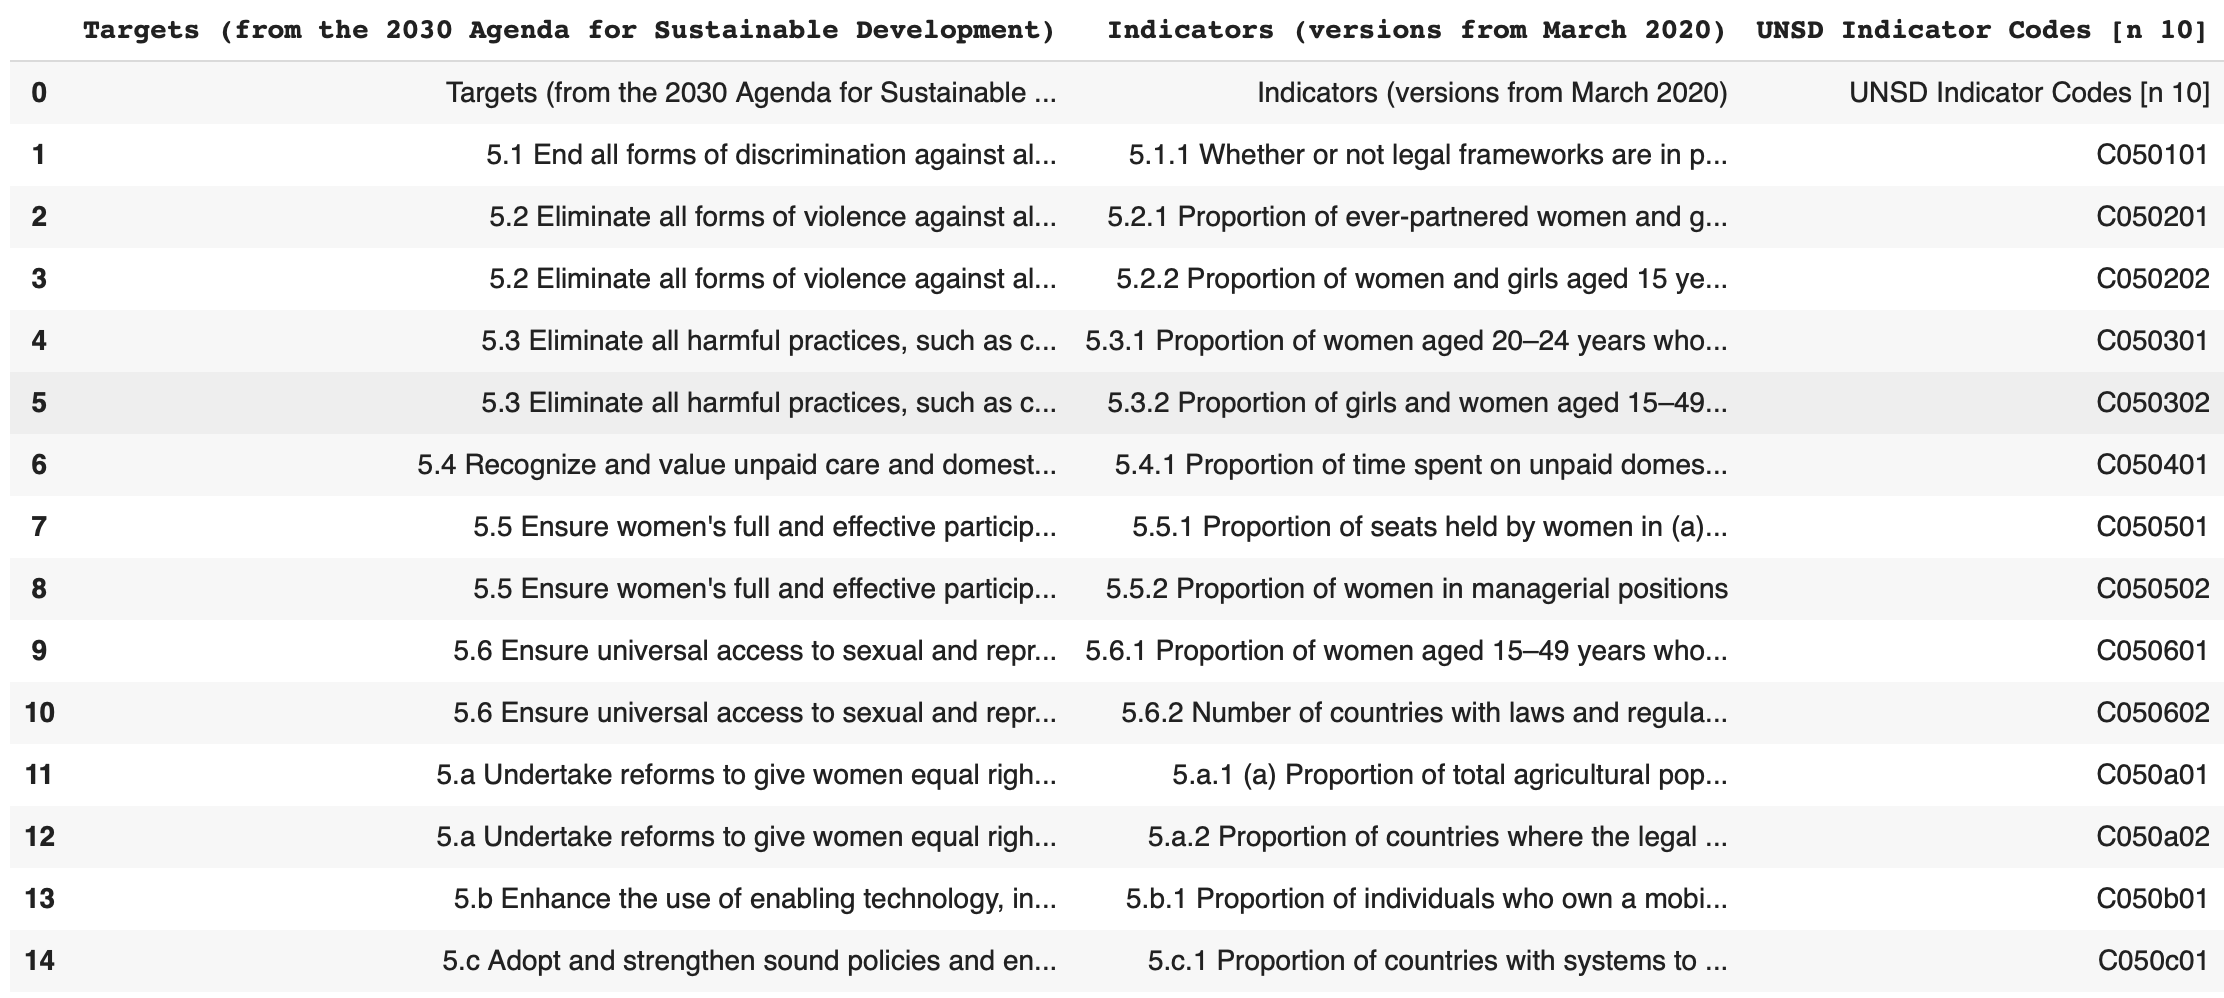






In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_Sustainable_Development_Goal_targets_and_indicators'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table for Goal 5
goal5_table = soup.find_all('table', class_='wikitable')[4]  # Adjust index if needed, 4th one because 1st = 0

# Extract rows
goal5_data = []  # Initialize an empty list to store the extracted data

for row in goal5_table.find_all('tr')[1:]:  # Loop through all table rows, skipping the first row (header), tr is a html tag.
#the first row has tag <th>, so the next line works because we skiped it.
    cols = row.find_all('td')  # Find all <td> (table data) elements in the row

    if len(cols) >= 3:  # Ensure the row has at least 3 columns (to avoid errors with empty rows)
        goal5_data.append({  # Append a dictionary with the extracted data to the list
            'Target (from the 2030 Agenda for Sustainable Developpement)': cols[0].get_text(strip=True),  # Get text from the first column (Target), remove extra spaces
            'Indicator (versions from March 2020)': cols[1].get_text(strip=True),  # Get text from the second column (Indicator)
            'UNSD Indicator Code': cols[2].get_text(strip=True)  # Get text from the third column (UNSD Indicator Code)
        })

# Create DataFrame
goal5_df = pd.DataFrame(goal5_data)
goal5_df